In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Alvin-igobwa/Amazon-project/main/Renewable%20energy%20vs%20Co2%20emissions.csv',index_col='Year')

In [ ]:
df.head()

,Entity,Code,Renewables (% growth),Annual CO2 emissions
Year,,,,
1966,Africa,NaN,11.538,221261615
1967,Africa,NaN,4.388,237257662
1968,Africa,NaN,16.971,257600231
1969,Africa,NaN,16.699,278139487
1970,Africa,NaN,25.020,302942683


In [ ]:
df=df.drop(columns=['Entity','Code'])

In [ ]:
df.head()

,Renewables (% growth),Annual CO2 emissions
Year,,
1966,11.538,221261615
1967,4.388,237257662
1968,16.971,257600231
1969,16.699,278139487
1970,25.020,302942683


In [ ]:
df['Annual CO2 emissions']=df['Annual CO2 emissions'].pct_change()*100

In [ ]:
df.head()

,Renewables (% growth),Annual CO2 emissions
Year,,
1966,11.538,NaN
1967,4.388,7.229472
1968,16.971,8.574041
1969,16.699,7.973307
1970,25.020,8.917539


In [ ]:
df.shape

(54, 2)

In [ ]:
df.describe()

,Renewables (% growth),Annual CO2 emissions
count,54.000000,53.000000
mean,4.781889,3.618049
std,6.040282,3.662934
min,-9.843000,-5.710124
25%,1.479500,1.458579
50%,4.524000,3.340298
75%,7.294250,7.182016
max,25.020000,9.659532


In [ ]:
df.isnull().sum()

Renewables (% growth)    0
Annual CO2 emissions     1
dtype: int64

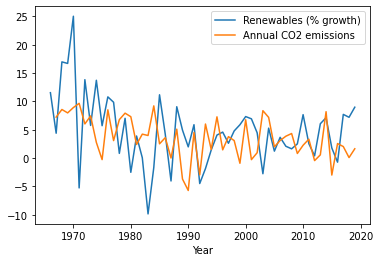

In [ ]:
df.plot()

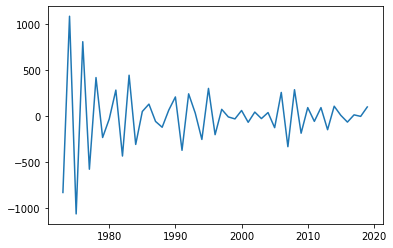

In [ ]:
# differencing the dataset to make it stationary
df=df.diff()
plt.plot(df)
plt.show()

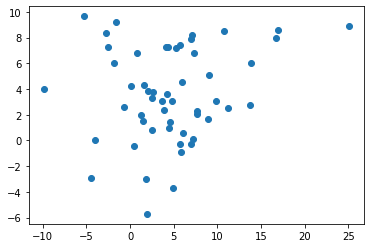

In [ ]:
plt.scatter(x='Renewables (% growth)',y='Annual CO2 emissions',data=df)

In [ ]:
df.dropna(inplace=True)

In [ ]:
adfuller(df)

(-10.735025701284558,
 2.9138782513090895e-19,
 10,
 36,
 {'1%': -3.626651907578875,
  '10%': -2.6116707716049383,
  '5%': -2.9459512825788754},
 291.3788868828653)

# VCM

In [ ]:
# splitting the data into training and test dataset
X_train,X_test=train_test_split(df,test_size=0.2)

In [ ]:

print(X_train.shape)

(37,)


In [ ]:
print(X_test.shape)

(10,)


In [ ]:
#checking for johansen cointegration
rank_test=select_coint_rank(X_train,det_order=1,k_ar_diff=1,method='trace',signif=0.01)
rank_test.rank
print(rank_test.summary())


In [ ]:
rank_test2=select_coint_rank(X_test.dropna(),det_order=1,k_ar_diff=1,method='maxeig',signif=0.01)
rank_test2.rank
print(rank_test2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          9.765          21.75
-------------------------------------


In [ ]:
#vecm estimation
vecm = VECM(endog = X_train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


array([[ -6.03944308,   4.38589294],
       [ -5.79474788,   0.94367394],
       [ 18.01568965,  10.09783771],
       [  9.4403876 ,   3.60155178],
       [  9.4596825 ,   4.1300136 ],
       [ 12.04914108,   5.27179341],
       [  1.08093017,   0.37332992],
       [  7.39098828,   2.31576534],
       [  8.87276859,   6.02651769],
       [-11.86631519,   1.35344981]])

In [ ]:
vecm_res=vecm.fit()

In [ ]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.Renewables (% growth),2.3452,0.959,2.447,0.014,0.466,4.224
L1.Annual CO2 emissions,0.5712,1.118,0.511,0.609,-1.621,2.763
L2.Renewables (% growth),1.8479,0.860,2.148,0.032,0.162,3.534
L2.Annual CO2 emissions,0.7730,1.048,0.737,0.461,-1.282,2.828
L3.Renewables (% growth),1.5432,0.738,2.090,0.037,0.096,2.990
L3.Annual CO2 emissions,1.0617,0.995,1.067,0.286,-0.888,3.011
L4.Renewables (% growth),1.2874,0.641,2.007,0.045,0.030,2.544
L4.Annual CO2 emissions,1.4236,0.894,1.593,0.111,-0.328,3.175
L5.Renewables (% growth),0.9411,0.558,1.687,0.092,-0.152,2.035
L5.Annual CO2 emissions,1.6944,0.826,2.051,0.040,0.075,3.314


In [ ]:
vecm_res.alpha

array([[-3.54260365, -0.69086647, 19.09897843],
       [-0.06826415, -1.10983717,  4.72293242]])

In [ ]:
vecm_res.stderr_alpha

array([[1.04041206, 1.12314498, 6.16867168],
       [0.71845592, 0.77558709, 4.25977252]])

In [ ]:
# vecm forecast
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print('lower bounds of confidence intervals:')
print(lower.round(3))
print('\npoint forecasts:')
print(forecast.round(3))
print('\nupper bounds of confidence intervals:')
print(upper.round(3))

lower bounds of confidence intervals:
[[  0.023  -0.643]
 [  1.131  -2.562]
 [ -5.105   1.809]
 [ -8.035   1.66 ]
 [ -7.408  -5.531]
 [  0.347  -5.599]
 [  0.037  -0.891]
 [-10.312  -4.199]
 [ -8.815  -5.984]
 [ -1.149   0.284]]

point forecasts:
[[ 6.718  3.42 ]
 [ 8.578  1.701]
 [ 2.413  6.276]
 [-0.383  6.2  ]
 [ 0.616 -0.958]
 [ 9.605 -0.527]
 [ 9.509  4.591]
 [-0.48   1.357]
 [ 1.027 -0.424]
 [ 8.799  6.181]]

upper bounds of confidence intervals:
[[13.413  7.483]
 [16.025  5.964]
 [ 9.932 10.743]
 [ 7.269 10.74 ]
 [ 8.64   3.614]
 [18.863  4.545]
 [18.981 10.073]
 [ 9.352  6.913]
 [10.87   5.136]
 [18.747 12.079]]


In [ ]:

#vecm forecast evaluation
vecm_res.predict(steps=5)

array([[-6.03944308,  4.38589294],
       [-5.79474788,  0.94367394],
       [18.01568965, 10.09783771],
       [ 9.4403876 ,  3.60155178],
       [ 9.4596825 ,  4.1300136 ]])

In [ ]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[-6.03944308  4.38589294]
 [-5.79474788  0.94367394]
 [18.01568965 10.09783771]
 [ 9.4403876   3.60155178]
 [ 9.4596825   4.1300136 ]]
lower:
[[-15.64420256  -2.24666793]
 [-15.67275969  -5.75720269]
 [  7.27769549   3.3659337 ]
 [ -1.43959619  -3.31993056]
 [ -1.5384056   -3.11096851]]
upper:
[[ 3.5653164  11.01845381]
 [ 4.08326394  7.64455057]
 [28.7536838  16.82974172]
 [20.32037139 10.52303411]
 [20.45777059 11.37099571]]


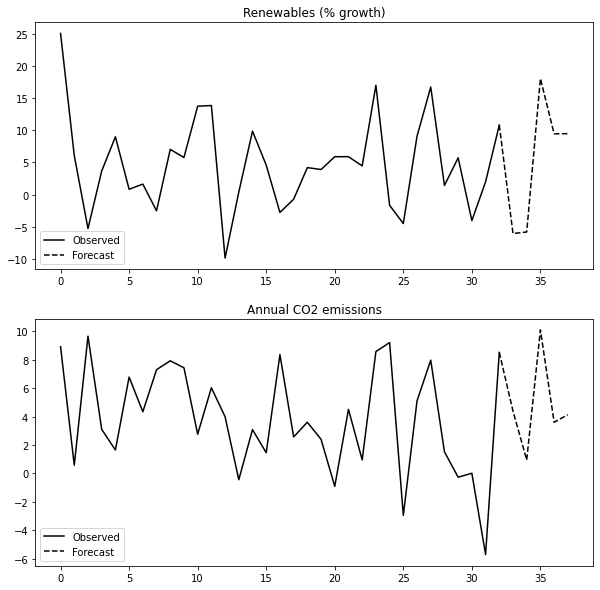

In [ ]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

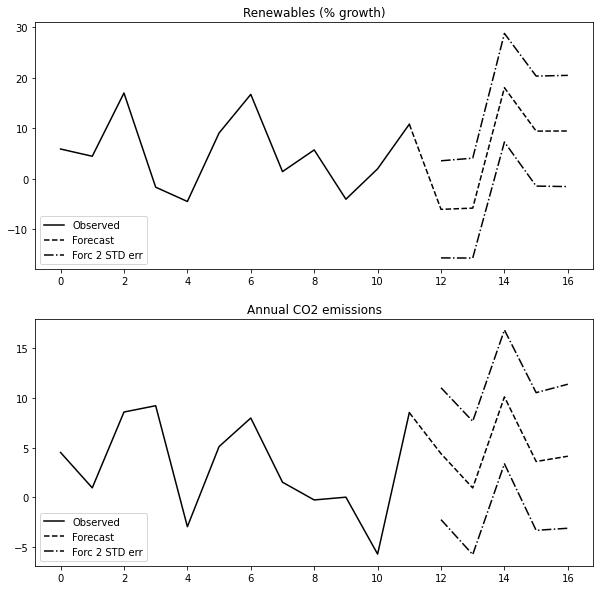

In [ ]:
vecm_res.plot_forecast(steps=5, n_last_obs=12)